# Adidas 미국 판매데이터 분석
 - [데이터 출처: 캐글 데이터셋](https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset)
 - columns description
     - Retalier ID: 판매점 ID
     - Price perUnit: 상품 단가(1개당 가격)
     - Units Sold: 판매수량
     - Total Sales: 총 판매금액
     - Operating Profit: 영업이익(매출액 - 원가)
     - Operating Margin: 영업마진(영업이익율)
     - Sales Method: 판매 방식(온라인, 매장, 아울렛)

## 데이터 업로드 및 확인

In [1]:
import pandas as pd
import numpy as np

ori = pd.read_csv('./datasets/Adidas_US_Sales_Datasets.csv')
ori.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020.1.1,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020.1.2,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,2020.1.3,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,2020.1.4,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,2020.1.5,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [2]:
ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


## 데이터 전처리
- null값 확인
- 데이터 타입 변경
    - Retailer ID: int64 --> str
    - Invoice Date: obj --> datetime
    - Pice per Unit: obj --> float
    - Units Sold: obj --> float
    - Total Sales: obj --> float
    - Operating Profit: obj --> float
    - Operating Margin: obj --> float

In [3]:
ori.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020.1.1,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020.1.2,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store


In [4]:
ori.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

### 전처리 - 타입변환

In [5]:
# int64 to str

df = ori.copy()

df['Retailer ID'] = df['Retailer ID'].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [6]:
# 정규표현식으로 문자열 변환 후 float 타입 변환

df['Price per Unit'] = df['Price per Unit'].str.replace('[$%,]', '', regex=True).astype('float')
df['Units Sold'] = df['Units Sold'].str.replace('[$%,]', '', regex=True).astype('float')
df['Total Sales'] = df['Total Sales'].str.replace('[$%,]', '', regex=True).astype('float')
df['Operating Profit'] = df['Operating Profit'].str.replace('[$%,]', '', regex=True).astype('float')
df['Operating Margin'] = df['Operating Margin'].str.replace('[$%,]', '', regex=True).astype('float')

df.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020.1.1,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020.1.2,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store


In [7]:
# Oerating Margin은 %이므로 0.01을 곱해 % 단위를 제거함.

df['Operating Margin'] = df['Operating Margin'] * 0.01

df.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020.1.1,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.5,In-store
1,Foot Locker,1185732,2020.1.2,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.3,In-store


In [13]:
# Invoice Date: object --> datetime
# format 지정: '%Y-%m-%d' for '2000-02-02'
# format 지정: '%Y%m%d' for '20000202'
# df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%Y-%m-%d')
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  year              9648 non-null   int32         
 14  month             9648 n

In [14]:
# year, month 추출 후 dataframe에 추가
df['year'] = df['Invoice Date'].dt.year
df['month'] = df['Invoice Date'].dt.month

df.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.5,In-store,2020,1


### 전처리 - 결측치처리

In [15]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
year                0
month               0
dtype: int64

In [16]:
# 전처리 결과 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
 13  year              9648 non-null   int32         
 14  month             9648 n

## 월별 판매량 분석

In [17]:
# 기초통계량 확인

df.describe()

,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,year,month
count,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.282131,0.422991,2020.865050,6.458126
min,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000,2020.000000,1.000000
25%,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1922.000000,0.350000,2021.000000,3.000000
50%,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.500000,0.410000,2021.000000,6.000000
75%,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52063.000000,0.490000,2021.000000,9.000000
max,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000,2021.000000,12.000000
std,NaN,14.705397,214.252030,141916.016727,54193.124141,0.097197,0.341688,3.454799


Text(0, 0.5, 'Sum of Units Sold')

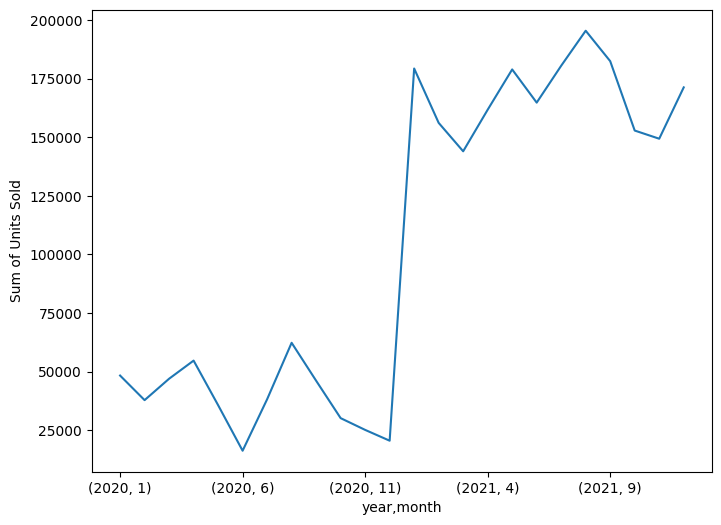

In [24]:
# 월별 판매량 그래프
# (2020, 11) 즈음에 판매량이 급증한 것을 확인할 수 있음.

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
df.groupby(['year', 'month'])['Units Sold'].sum().plot.line()
plt.ylabel('Sum of Units Sold')

<Axes: xlabel='year,month'>

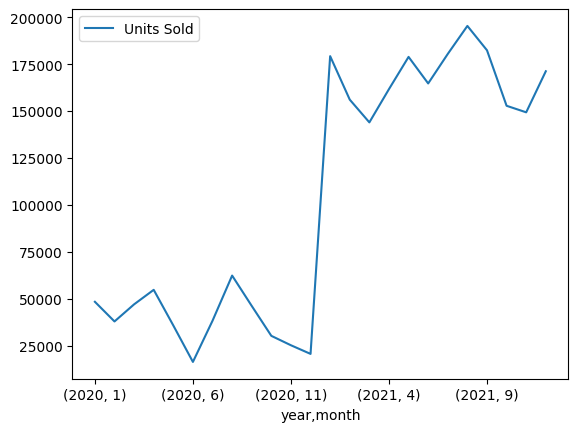

In [25]:
pd.pivot_table(index=['year', 'month'], values=['Units Sold'], aggfunc='sum', data=df).plot.line()

In [37]:
# 년-월별 판매량 합계 데이터 확인

df.pivot_table(index=['year', 'month'], values='Units Sold', aggfunc='sum')

Units Sold
year month            
2020 1         48333.0
     2         37846.0
     3         46972.0
     4         54709.0
     5         35705.0
     6         16269.0
     7         38219.0
     8         62307.0
     9         46125.0
     10        30167.0
     11        25152.0
     12        20545.0
2021 1        179299.0
     2        156113.0
     3        143988.0
     4        161717.0
     5        178900.0
     6        164745.0
     7        180481.0
     8        195414.0
     9        182425.0
     10       152834.0
     11       149350.0
     12       171246.0

In [38]:
# 월별 판매량 확인

df.pivot_table(index='year', columns='month', values='Units Sold', aggfunc='sum')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,48333.0,37846.0,46972.0,54709.0,35705.0,16269.0,38219.0,62307.0,46125.0,30167.0,25152.0,20545.0
2021,179299.0,156113.0,143988.0,161717.0,178900.0,164745.0,180481.0,195414.0,182425.0,152834.0,149350.0,171246.0


In [39]:
# Retailer별(유통사별) 판매량 확인
# Amazon, Kohl's는 2021년부터 판매를 시작

df.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum')

Retailer     Amazon  Foot Locker   Kohl's  Sports Direct  Walmart  West Gear
year month                                                                  
2020 1          NaN      30275.0      NaN            NaN      NaN    18058.0
     2          NaN      14712.0      NaN            NaN      NaN    23134.0
     3          NaN      27650.0      NaN            NaN      NaN    19322.0
     4          NaN       2216.0      NaN            NaN  22146.0    30347.0
     5          NaN       2071.0      NaN         4584.0  10950.0    18100.0
     6          NaN          NaN      NaN            NaN      NaN    16269.0
     7          NaN          NaN      NaN        15198.0   1630.0    21391.0
     8          NaN      17796.0      NaN        10337.0  29676.0     4498.0
     9          NaN       5625.0      NaN         6203.0  19619.0    14678.0
     10         NaN       4446.0      NaN         9944.0  15777.0        NaN
     11         NaN       8193.0      NaN            NaN      NaN    16959.0
     12         NaN       7320.0   2214.0            NaN      NaN    11011.0
2021 1      13006.0      40384.0  29841.0        28070.0      NaN    67998.0
     2      14609.0      36526.0  32766.0        25159.0   1617.0    45436.0
     3      13204.0      31078.0  31904.0        38838.0   3409.0    25555.0
     4      12548.0      26734.0  37976.0        49526.0   6784.0    28149.0
     5      15489.0      35513.0  47726.0        38996.0   8007.0    33169.0
     6      17917.0      56632.0  15116.0        23859.0  10949.0    40272.0
     7      19510.0      59350.0  16403.0        27413.0  16342.0    41463.0
     8      18014.0      41453.0  15675.0        70385.0  17343.0    32544.0
     9      14879.0      24116.0  13671.0        90087.0  15359.0    24313.0
     10     17767.0      28945.0  12409.0        56195.0  13204.0    24314.0
     11     20456.0      43742.0  14765.0        30090.0   9090.0    31207.0
     12     20591.0      59592.0  16909.0        32756.0   4323.0    37075.0

<Axes: xlabel='year,month'>

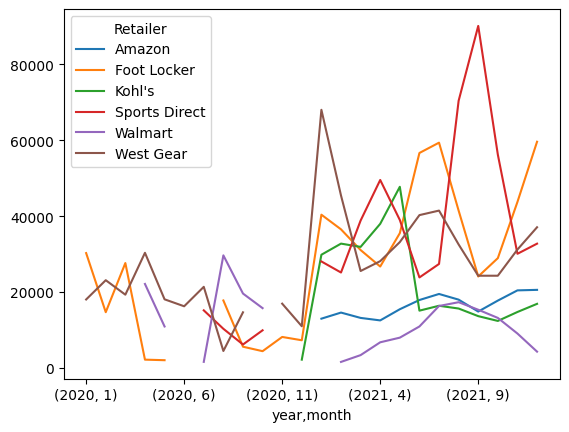

In [40]:
# Retailer별(유통사별) 판매량 그래프 확인

df.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum').plot.line()

In [41]:
# 소매브랜드 안에도 ID가 여러 개 있는 것으로 보아 점포 ID인 것 같음.
# 소매브랜드 점포 현황을 보기 위하여 중복되는 값은 지우고 표현함.

df[['Retailer', 'Retailer ID']].drop_duplicates().sort_values('Retailer')

,Retailer,Retailer ID
1148,Amazon,1185732
2007,Foot Locker,1197831
1287,Foot Locker,1128299
0,Foot Locker,1185732
212,Kohl's,1189833
2147,Kohl's,1128299
1499,Kohl's,1185732
2786,Kohl's,1197831
766,Sports Direct,1185732
68,Sports Direct,1197831


In [61]:
# 월별 소매브랜드 별 숫자는 늘어났을까?
# 점포 수 확장에 의해 판매량이 늘어났을까?
# drop_duplicates()를 하는 이유는 일자별까지도 데이터가 들어가 있기 때문에 점표 수를 세기 위해서는 이 함수를 써야함.

df2 = df[['Retailer', 'Retailer ID', 'year', 'month']].drop_duplicates().sort_values(['Retailer', 'year', 'month'])
df2

,Retailer,Retailer ID,year,month
1224,Amazon,1185732,2021,1
1225,Amazon,1185732,2021,2
1231,Amazon,1185732,2021,3
1237,Amazon,1185732,2021,4
1243,Amazon,1185732,2021,5
...,...,...,...,...
1923,West Gear,1128299,2021,11
2715,West Gear,1197831,2021,11
1427,West Gear,1128299,2021,12
1497,West Gear,1185732,2021,12


In [63]:
# 연-월별 모든 점포 수 확인

df2.pivot_table(index=['year', 'month'], values='Retailer ID', aggfunc='count')

Retailer ID
year month             
2020 1                2
     2                2
     3                2
     4                4
     5                4
     6                1
     7                3
     8                5
     9                4
     10               3
     11               2
     12               3
2021 1               14
     2               15
     3               15
     4               15
     5               15
     6               13
     7               15
     8               16
     9               15
     10              16
     11              14
     12              13

<AxesSubplot:xlabel='year,month'>

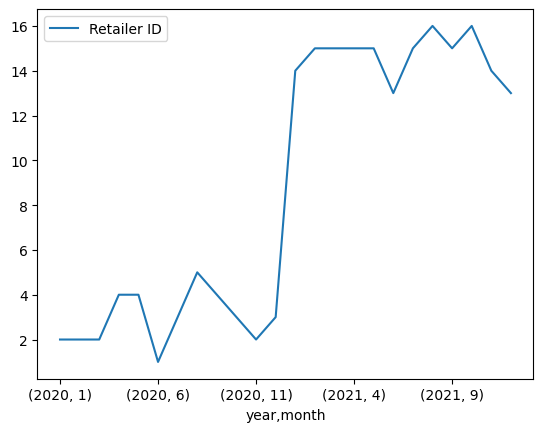

In [65]:
# 연-월별 모든 점포 수 그래프로 확인

df2.pivot_table(index=['year', 'month'], values='Retailer ID', aggfunc='count').plot.line()

In [64]:
# 연-월별 브랜드별 점포 수 확인

df2.pivot_table(index=['year', 'month'], columns='Retailer', values='Retailer ID', aggfunc='count')

Retailer    Amazon  Foot Locker  Kohl's  Sports Direct  Walmart  West Gear
year month                                                                
2020 1         NaN          1.0     NaN            NaN      NaN        1.0
     2         NaN          1.0     NaN            NaN      NaN        1.0
     3         NaN          1.0     NaN            NaN      NaN        1.0
     4         NaN          1.0     NaN            NaN      1.0        2.0
     5         NaN          1.0     NaN            1.0      1.0        1.0
     6         NaN          NaN     NaN            NaN      NaN        1.0
     7         NaN          NaN     NaN            1.0      1.0        1.0
     8         NaN          1.0     NaN            1.0      1.0        2.0
     9         NaN          1.0     NaN            1.0      1.0        1.0
     10        NaN          1.0     NaN            1.0      1.0        NaN
     11        NaN          1.0     NaN            NaN      NaN        1.0
     12        NaN          1.0     1.0            NaN      NaN        1.0
2021 1         1.0          3.0     4.0            3.0      NaN        3.0
     2         1.0          3.0     4.0            3.0      1.0        3.0
     3         1.0          3.0     4.0            3.0      1.0        3.0
     4         1.0          2.0     4.0            3.0      2.0        3.0
     5         1.0          2.0     4.0            3.0      2.0        3.0
     6         1.0          2.0     3.0            2.0      2.0        3.0
     7         1.0          3.0     3.0            2.0      3.0        3.0
     8         1.0          3.0     3.0            3.0      3.0        3.0
     9         1.0          2.0     3.0            3.0      3.0        3.0
     10        1.0          3.0     3.0            3.0      3.0        3.0
     11        1.0          3.0     3.0            3.0      1.0        3.0
     12        1.0          3.0     3.0            2.0      1.0        3.0

<AxesSubplot:xlabel='year,month'>

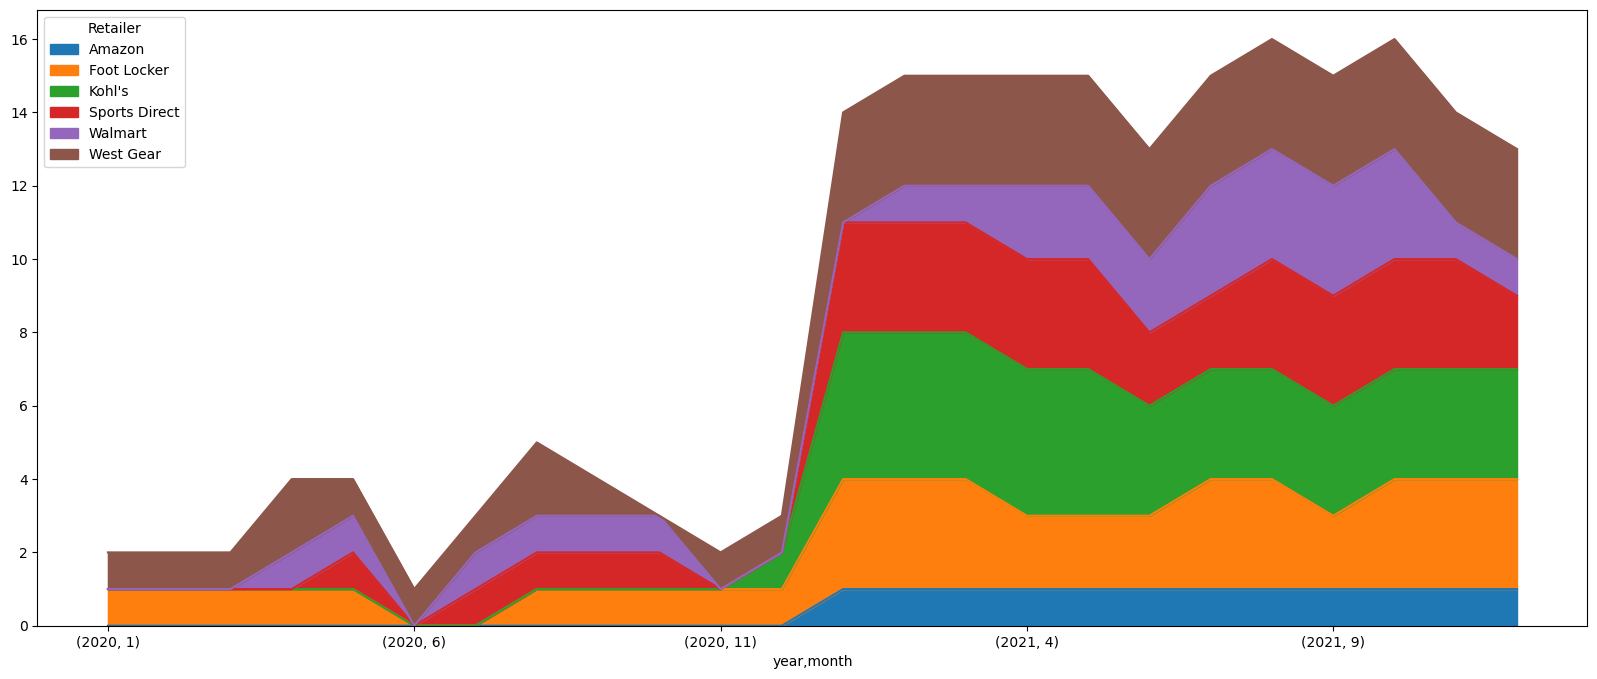

In [69]:
# 연-월별 브랜드별 점포 수 그래프로 확인
# 점포수가 늘어난게 보임.
# 왜 갑자기 늘어났을까에 대한 의문은 다른 외부 자료가 필요함.
# 코로나, 백신 관련, 스포츠업계 변화, 경제 등에 대한 추가 자료를 이용한 분석이 필요해 보임.

df2.pivot_table(index=['year', 'month'], columns='Retailer', values='Retailer ID', aggfunc='count').plot(kind='area', figsize=(20,8))

## 마진율 분석
- Operating Margin = Operating Profit / Total Sales

In [72]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020,1
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020,1
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020,1
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020,1


In [73]:
# 연 마진율 확인

df.groupby('year').agg({'Operating Margin':'mean'})

,Operating Margin
year,
2020,0.403733
2021,0.425996


<AxesSubplot:xlabel='year,month'>

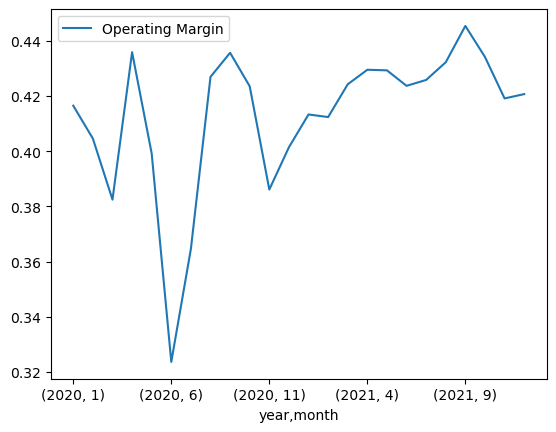

In [75]:
# 연-월별 마진율 변화 확인 그래프

df.groupby(['year', 'month']).agg({'Operating Margin':'mean'}).plot(kind='line')

<AxesSubplot:xlabel='year,month'>

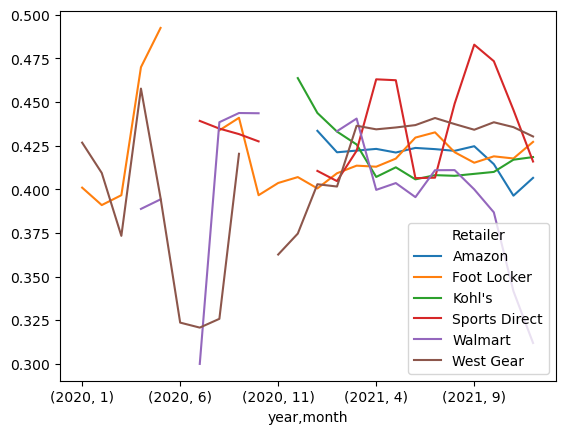

In [76]:
# 연-월별 소매 브랜드별 마진율 변화 확인 그래프

df.pivot_table(index=['year', 'month'], columns='Retailer', values='Operating Margin', aggfunc='mean').plot.line()

## 판매방법(판매 채널)에 따른 판매량 분석
 - 오프라인: 매장, 점원 보유
 - 온라인: 매장 불필요, 시스템 유지관리 필요

<AxesSubplot:xlabel='year,month'>

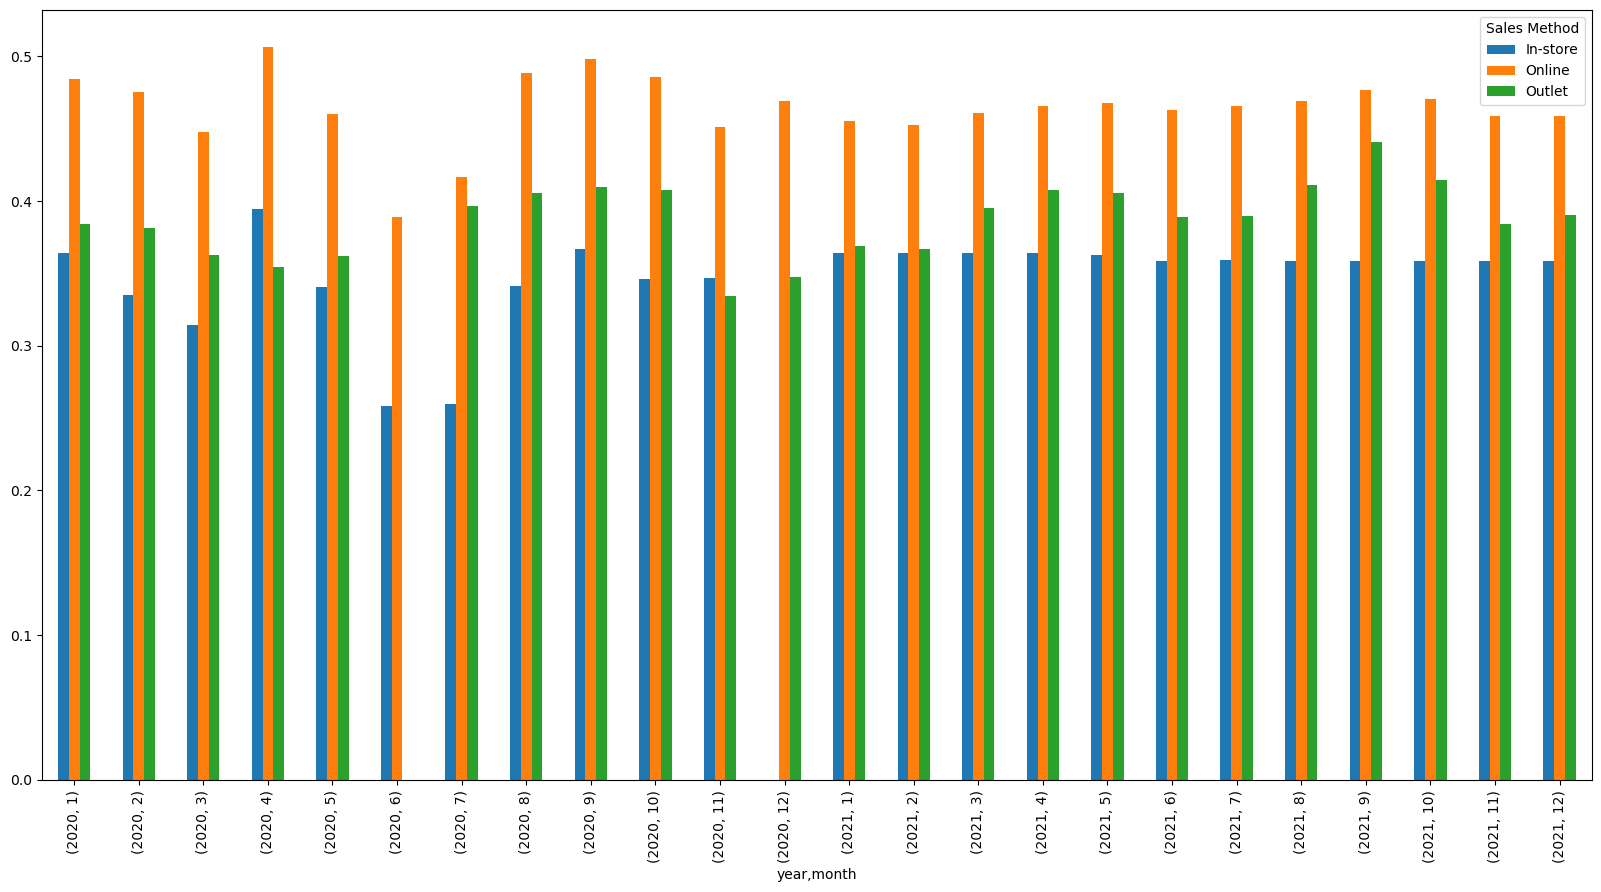

In [86]:
# 연-월별 판매 방법별 마진율 변화 확인 그래프
# 시간이 지날수록 마진율 순위: 온라인 > 아울렛 > 매장
# 추가 자료를 통해 왜 이런지에 대한 요인 분석을 할 수 있을 것.

df.pivot_table(index=['year', 'month'], columns='Sales Method', values='Operating Margin', aggfunc='mean').plot(kind='bar', figsize=(20, 10))

In [42]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'year',
       'month'],
      dtype='object')

<Axes: xlabel='year,month'>

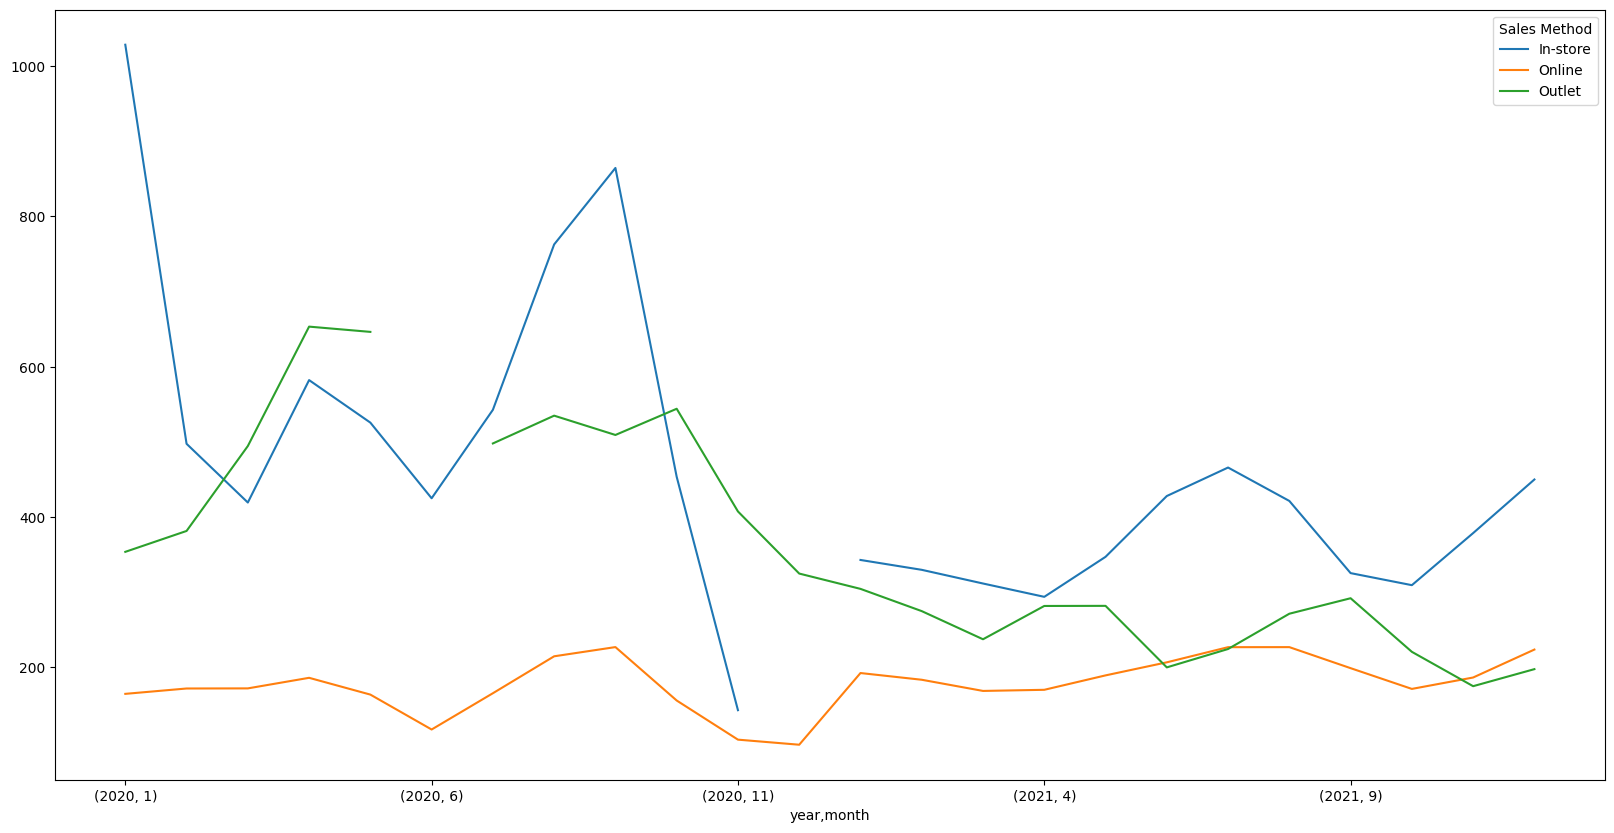

In [45]:
# 연-월별 판매 방법별 판매량 변화 확인 그래프
# values를 'Units Sold', 'Price Per Unit', 'Total Sales'을 바꿔가며 확인해볼 것.

df.pivot_table(index=['year', 'month'], columns='Sales Method', values='Units Sold', aggfunc='mean').plot(kind='line', figsize=(20, 10))

## 판매방법에 따라 판매성과의 유의미한 차이가 있을까? - 분산분석
 - 일원배치 분산분석(ANOVA)을 이용한 통계적 검증
 - 세 개 이상의 집단이 하나의 변수에 대해 차이가 나는지 검증하는 분석방법
 - 최소자승법(OLS, Ordinary Least Square)를 이용하여 검증할 수 있음.

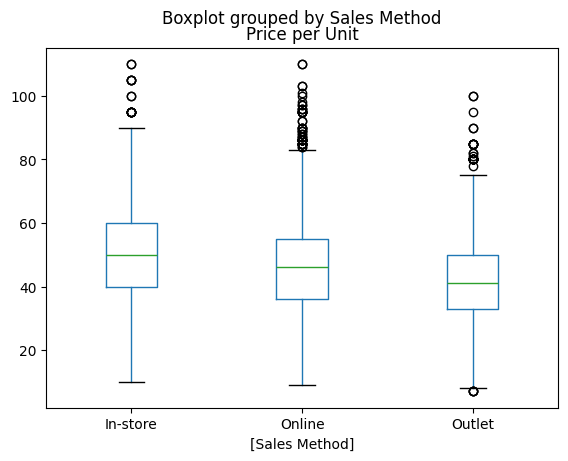

In [46]:
# (박스플랏)판매 방법에 따른 단가의 분포

df[['Sales Method', 'Price per Unit']].boxplot(by='Sales Method')
plt.grid(False)

<AxesSubplot:title={'center':'Operating Margin'}, xlabel='Sales Method', ylabel='Operating Margin'>

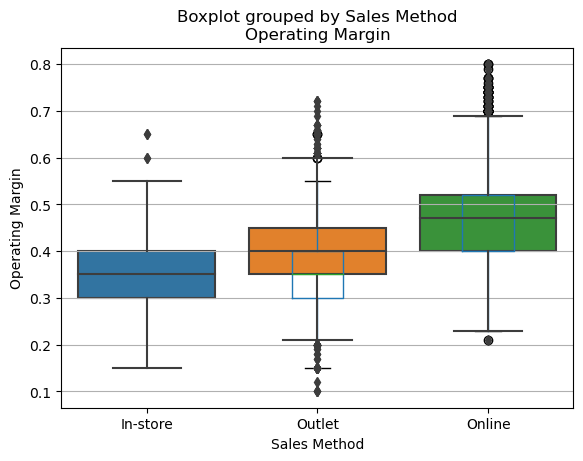

In [93]:
# (박스플랏)판매 방법에 따른 영업이익의 분포

# df[['Sales Method', 'Operating Margin']].boxplot(by='Sales Method')
sns.boxplot(df, x='Sales Method', y='Operating Margin')

In [48]:
# ANOVA 분석
# ols 모델 설정 및 실행

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# x: 비교그룹(Sales Method)
# y: 비교할 변수(Operating Margin)
# 귀무가설: 판매방법에 따른 영업이익률은 유의미한 차이가 없다.
# 대립가설: 판매방법에 따른 영업이익률은 유의미한 차이가 있다.

x = 'Sales_Method'
y = 'Operating_Margin'

df_anova = df[['Sales Method', 'Operating Margin']]
df_anova.columns = [x, y]

df_anova.head()
model = ols(f'{y}~C({x})', df_anova).fit()

In [50]:
# if PR < 0.05 --> 귀무가설 기각
# 세 가지 판매방법에 따른 마진율의 차이는 유의미한 차이가 있다.

anova_tbl = anova_lm(model)
print(anova_tbl)

                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN


In [51]:
# 분산분석 함수 생성

def anova_analysis(x, y):
    df_anova = df[[x, y]]
    
    if ' ' in x:
        x = x.replace(' ', '_')
    if ' ' in y:
        y = y.replace(' ', '_')
    df_anova.columns = [x, y]
    
    model = ols(f'{y}~C({x})', df_anova).fit()
    anova_tbl = anova_lm(model)
    print(anova_tbl)

In [52]:
# 결과 해석해보기

anova_analysis('Sales Method', 'Operating Margin')
anova_analysis('Sales Method', 'Price per Unit')

                     df     sum_sq   mean_sq            F  PR(>F)
C(Sales_Method)     2.0  18.450217  9.225109  1224.079115     0.0
Residual         9645.0  72.688254  0.007536          NaN     NaN
                     df        sum_sq       mean_sq           F        PR(>F)
C(Sales_Method)     2.0  5.550261e+04  27751.304281  131.810754  3.339384e-57
Residual         9645.0  2.030649e+06    210.538999         NaN           NaN


## streamlit 활용을 위한 코드 함수화

In [53]:
%reload_ext autoreload
%autoreload 2

In [62]:
%%writefile app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

ori = pd.read_csv('./datasets/Adidas_US_Sales_Datasets.csv')

# 데이터 전처리
df = ori.copy()
df['Retailer ID'] = df['Retailer ID'].astype('str')
df['Price per Unit'] = df['Price per Unit'].str.replace('[$%,]', '', regex=True).astype('float')
df['Units Sold'] = df['Units Sold'].str.replace('[$%,]', '', regex=True).astype('float')
df['Total Sales'] = df['Total Sales'].str.replace('[$%,]', '', regex=True).astype('float')
df['Operating Profit'] = df['Operating Profit'].str.replace('[$%,]', '', regex=True).astype('float')
df['Operating Margin'] = df['Operating Margin'].str.replace('[$%,]', '', regex=True).astype('float')
df['Operating Margin'] = df['Operating Margin'] * 0.01
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['year'] = df['Invoice Date'].dt.year
df['month'] = df['Invoice Date'].dt.month

# 이미지 및 테이블 생성 함수
def sales_plot():
    fig = plt.figure(figsize=(8, 6))
    df.groupby(['year', 'month'])['Units Sold'].sum().plot()
    plt.ylabel('Sum of Units Sold')
    st.pyplot(fig)

def retail_plot():
    fig, ax = plt.subplots(figsize=(20, 8))
    df.pivot_table(index=['year', 'month'], columns='Retailer', values='Units Sold', aggfunc='sum').plot(ax=ax)
    st.pyplot(fig)

def brand_retail_count_plot():
    df2 = df[['Retailer', 'Retailer ID', 'year', 'month']].drop_duplicates().sort_values(['Retailer', 'year', 'month'])
    fig, ax = plt.subplots(figsize=(20, 8))
    df2.pivot_table(index=['year', 'month'], columns='Retailer', values='Retailer ID', aggfunc='count').plot(kind='area', ax=ax)
    st.pyplot(fig)

def method_sales_plot(val='Units Sold'):
    fig, ax = plt.subplots(figsize=(20, 10))
    df.pivot_table(index=['year', 'month'], columns='Sales Method', values=val, aggfunc='mean').plot(ax=ax)
    st.pyplot(fig)

def method_sales_boxplot():
    fig, ax = plt.subplots()
    df[['Sales Method', 'Price per Unit']].boxplot(by='Sales Method', ax=ax)
    plt.grid(False)
    st.pyplot(fig)

def method_margin_boxplot():
    fig, ax = plt.subplots()
    sns.boxplot(data=df, x='Sales Method', y='Operating Margin', ax=ax)
    st.pyplot(fig)

def anova_analysis(x, y):
    df_anova = df[[x, y]]
    if ' ' in x:
        x = x.replace(' ', '_')
    if ' ' in y:
        y = y.replace(' ', '_')
    df_anova.columns = [x, y]
    model = ols(f'{y} ~ C({x})', data=df_anova).fit()
    anova_tbl = anova_lm(model)
    return anova_tbl


st.sidebar.title("Adidas US Sales Analysis")
# option = st.sidebar.selectbox("Choose a section", ["연-월별 데이터 분석", "판매 방법에 따른 데이터분석", "판매 방법에 따른 마진율 분산분석"])
pages = ["연-월별 데이터 분석", "판매 방법에 따른 데이터분석", "판매 방법에 따른 마진율 분산분석"]
option = st.sidebar.radio("Go to", pages)

if option == "연-월별 데이터 분석":
    tabs = st.tabs(["Sales", "Retail", "Brand Retail Count"])
    
    with tabs[0]:
        st.header("Sales Plot")
        sales_plot()
        st.write("연-월별 판매량을 보여주는 그래프입니다. 특정 시점에서 판매량의 급증을 확인할 수 있습니다.")

    with tabs[1]:
        st.header("Retail Plot")
        retail_plot()
        st.write("연-월별 소매업체별 판매량을 보여주는 그래프입니다. 특정 소매업체에서 판매가 시작된 시점을 확인할 수 있습니다.")
        
    with tabs[2]:
        st.header("Brand Retail Count")
        brand_retail_count_plot()
        st.write("연-월별 브랜드별 소매점 수를 보여주는 그래프입니다. 특정 시점에서 소매점 수의 증가를 확인할 수 있습니다.")
        
elif option == "판매 방법에 따른 데이터분석":
    tabs = st.tabs(["Sales Plot", "Box Plot"])
    
    with tabs[0]:
        st.header("Sales Plot")
        val = st.selectbox("Select a metric", ['Units Sold', 'Price per Unit', 'Total Sales'])
        method_sales_plot(val)
        
    with tabs[1]:
        st.header("Box Plot")
        radio_val = st.radio("Select a distribution", ['단가 분포', '영업이익 분포'])
        if radio_val == '단가 분포':
            method_sales_boxplot()
        else:
            method_margin_boxplot()

elif option == "판매 방법에 따른 마진율 분산분석":
    st.header("판매 방법에 따른 마진율 분산분석")
    y = st.selectbox("Select a variable", ['Operating Margin', 'Price per Unit'])
    result = anova_analysis('Sales Method', y)
    st.write(result)
    st.write("ANOVA 결과를 통해 판매 방법에 따른 선택 변수의 유의미한 차이를 확인할 수 있습니다.")


Overwriting app.py


In [63]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8504
  Network URL: http://192.168.0.4:8504

^C
  Stopping...


## requirements.txt 파일 만들기

- requirements.txt 파일 만들기
```bash
pip list --format=freeze > requirements_all.txt
```

- streamlit 실행에 반드시 필요한 라이브러리만 선택
```bash
libraries_to_keep = ['numpy', 'pandas', 'streamlit', 'matplotlib',
         'seaborn', 'plotly', 'statsmodels']

input_filename = 'requirements_all.txt'

output_filename = 'requirements.txt'


filtered_libraries = []


with open(input_filename, 'r') as file:
 lines = file.readlines()


for line in lines:
 for lib in libraries_to_keep:
     if line.startswith(lib):
         filtered_libraries.append(line)
         break


with open(output_filename, 'w') as file:
 file.writelines(filtered_libraries)

print(f"Filtered requirements saved to {output_filename}")
```

# 연습문제
- 아래 E-Commerce 데이터분석 코드 분석하기
- 코드를 함수화하고 app.py 파일에 정리하기
- Streamlit을 이용하여 데이터 분석 시각화 하기
- 웹앱 배포하기 

# E-Commerce 데이터 분석

## 데이터 업로드 및 확인

In [64]:
import pandas as pd
import numpy as np

olist_df = pd.read_csv('./datasets/List of Orders.csv')
odetail_df = pd.read_csv('./datasets/Order Details.csv')

olist_df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [65]:
odetail_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [66]:
# profit이 마이너스? 캐글데이터에 정확한 정보가 없음.
# 환불일수도 있겠다.  

odetail_df.loc[odetail_df['Profit']<0, 'Profit'].count()
odetail_df.loc[odetail_df['Profit']>0, 'Profit'].count()
odetail_df.loc[odetail_df['Profit']==0, 'Profit'].count()


47

In [67]:
olist_df.info(), odetail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


(None, None)

## 데이터 전처리

### 결측치 처리하기

In [68]:
# 각 행마다 결측치가 있는 경우는, 모든 컬럼에 대해 결측치가 존재함을 확인함.

odf = olist_df.isnull().sum(axis=1)[olist_df.isnull().sum(axis=1)>0]


In [69]:
# null 값이 포함된 데이터 삭제

olist_df.dropna(inplace=True)
len(olist_df)

500

In [70]:
# olist_df와 odetail_df를 merging 함.
# 누락 또는 중복 확인 필요

df = olist_df.merge(odetail_df, on='Order ID')
df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [71]:
# 결측치 처리 후 결측치 확인

df.isnull().values.any()

False

### 날짜 데이터 처리

In [72]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [73]:
# 주문 날짜 시작과 끝 확인

df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2018-04-01 00:00:00'), Timestamp('2019-03-31 00:00:00'))

In [74]:
# 연, 월, 연월 추출

df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['yearmonth'] = df['Order Date'].astype('str').str.slice(0, 7)

df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,year,month,yearmonth
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,2018,4,2018-04
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,2018,4,2018-04
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,2018,4,2018-04
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,2018,4,2018-04
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,2018,4,2018-04


## Plotly를 이용한 시각화 분석(EDA)

### 판매 분석

In [75]:
# express 모듈 불러오기

import plotly.express as px

df2 = df.pivot_table(index='yearmonth', values='Quantity', aggfunc='sum').reset_index()
df2

,yearmonth,Quantity
0,2018-04,389
1,2018-05,423
2,2018-06,369
3,2018-07,240
4,2018-08,446
5,2018-09,331
6,2018-10,419
7,2018-11,578
8,2018-12,412
9,2019-01,745


In [87]:
# 라인 그래프

px.line(df2, x='yearmonth', y='Quantity', title='Sales Quantity by month')

In [79]:
# express 모듈 불러오기

import plotly.express as px

df3 = df.pivot_table(index='yearmonth', values='Amount', aggfunc='sum').reset_index()
px.line(df3, x='yearmonth', y='Amount', title='Sales Amount by month')

In [80]:
# bar 그래프

df4 = df.pivot_table(index='Category', values=['Quantity'], aggfunc='sum').reset_index()
px.bar(df4, x='Category', y='Quantity', title='Quantity by Category')

In [81]:
df5 = df.pivot_table(index=['yearmonth', 'Category'], values=['Quantity'], aggfunc='sum').reset_index()
df5.head()

,yearmonth,Category,Quantity
0,2018-04,Clothing,251
1,2018-04,Electronics,75
2,2018-04,Furniture,63
3,2018-05,Clothing,233
4,2018-05,Electronics,116


In [82]:
# 누적바 그래프(시계열과 카테고리 데이터를 동시에 보기 좋음)

px.bar(df5, x='yearmonth', y='Quantity', color='Category')

In [83]:
# heat map을 이용한 지역별 주력 판매상품 분석

df6 = df.pivot_table(index=['State', 'Sub-Category'], values=['Quantity', 'Amount', 'Profit'], aggfunc='sum').reset_index()
df6.head()

,State,Sub-Category,Amount,Profit,Quantity
0,Andhra Pradesh,Accessories,231.0,22.0,2
1,Andhra Pradesh,Bookcases,4581.0,-1642.0,25
2,Andhra Pradesh,Electronic Games,188.0,-193.0,2
3,Andhra Pradesh,Furnishings,57.0,7.0,3
4,Andhra Pradesh,Hankerchief,710.0,80.0,32


In [84]:
# Quantity heatmap

px.density_heatmap(df6, x='State', y='Sub-Category', z='Quantity', title='Quantity heatmap by State and Sub-category')

In [85]:
# Amount heatmap

fig = px.density_heatmap(df6, x='State', y='Sub-Category', z='Amount', title='Quantity heatmap by State and Sub-category')
fig.show()

## 함수 모듈화

## Streamlit을 이용한 대시보드 구현